# **INTRODUCTION**
DS220 Project 2 - Stock Market Analysis

Author - Ram Bharadwaj Gandikota

## **Overview**
The main goal of this project is to analyze data collected for 30 years about the stock market, such analysis can help us provide insights to Financial Institutions about long-term perfromance of various stocks and thus allowing them to make a more informed and evidene-based decisions to optimize investmenet strategies.

## **DataSet Information**
The Data Set we will be using is a public-use dataset created by Asim Islam (Data Analyst) which is updated anually which collected 30 years of stock market data, mainly prices of various index funds, treasury yeilds and major global index funds. The dataset has been altered by this notebook's author: Ram Bharadwaj(manually removed corrupted columns).

Link to Dataset: https://www.kaggle.com/datasets/asimislam/30-yrs-stock-market-data/?select=30_yr_stock_market_data.csv

Columns Include (Features):
1. Date
2. Dow Jones (^DJI)
3. Nasdaq (^IXIC)
4. S&P500 (^GSPC)
5. NYSE Composite (^NYA)
6. Russell 2000 (^RUT)
7. CBOE Volatility (^VIX)
8. DAX Index (^GDAXI)
9. FTSE 100 (^FTSE)
10. Hang Seng Index (^HSI)
11. Treasury Yield 5 Years (^FVX)
12. Treasury Bill 13 Week (^IRX)
13. Treasury Yield 10 Years (^TNX)
14. Treasury Yield 30 Years (^TYX)

## **Purpose**
We will make use of the Pandas library, as well as some other well known libaries such as maplotlib and numpy to perfrom in-depth analysis on the collected stock market data. This includes:
1. Loading CSV file
2. Exploratory Data Analysis
3. Pre-Processing and Clean-up
4. Data Analysis (Trend Analysis)
5. Visualization
6. Conclusion


### **Imports**
We will start by importing: Pandas, Numpy and MalPlotLib libraries

In [10]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading the CSV file**
We will be making use of Pandas library, specifically read_csv() function to read in our CSV file into a DataFrame in order to have the ability to perfrom an other tasks. The Data Frame will be a xy 2 dimensional structure with columns being the various stock market listings and rows being the year, the cells contain the price for each year.

In [11]:
file_name = 'stock_market_csv.csv'
df = pd.read_csv(file_name)

### **Exploratory Data Analysis**

In order to understand how our dataset is, we can perform some analysis in order to understand the basic format of the data set, using .head() and then dive into this exploration further by using .isnull().sum() to check for missing data, .describe() and .dtype to understand what type of data we have, and finally use .shape to get the dimensions of the data.

In [12]:
head = df.head()
missing = df.isnull().sum()
description = df.describe()
dataType = df.dtypes
dimensions = df.shape

print("Sample Data: " , head)
print("Missing Data: ", missing)
print("Description: ", description)
print("Data Types: ", dataType)
print("Dimensions: ", dimensions)

Sample Data:           Date  Dow Jones (^DJI)  Nasdaq (^IXIC)  S&P500 (^GSPC)  \
0  1993-11-29       3677.800049      751.539978      461.899994   
1  1993-11-30       3683.949951      754.390015      461.790009   
2  1993-12-01       3697.080078      763.809998      461.890015   
3  1993-12-02       3702.110107      766.729980      463.109985   
4  1993-12-03       3704.070068      772.219971      464.890015   

   NYSE Composite (^NYA)  Russell 2000 (^RUT)  CBOE Volitility (^VIX)  \
0            2697.040039           250.139999                   14.12   
1            2694.080078           250.410004                   13.76   
2            2699.159912           252.610001                   13.83   
3            2705.179932           252.910004                   13.51   
4            2714.699951           253.860001                   12.69   

   DAX Index (^GDAXI)  FTSE 100 (^FTSE)  Hang Seng Index (^HSI)  \
0         2052.090088       3135.800049             9012.799805   
1         

### **Exploratory Data Analysis Interpretation**
Based on the outputted information:
1. The head shows us the general format of the data, which as mentioned before is columns of various finacial investment options and rows being the years, with the pricing data attaching to each combination of row-column.
2. We see there is quite a bit of missing data, with Hang Seng Index (^HSI) - 352 various instances of missing data as the highest missing data per column, other 12 columns also seem to have missing data which needs to be handled in pre-processing and cleanup. The only column with no missing data is the date column
3. The dimensions of the dataframe tell us that, there are 14 features we can make use of in our analysis with 7754 entires (rows) of data.
4. Most of the data is of type float64 which is great to perfrom numerical operations on for analysis.

### **Pre-Processing and Data Cleanup**

Pre-Processing and Data Cleanup is a vital part of data analysis. When we have missing information or data that is not normalized, it can make data analysis very difficult and hinder the process. So we will be making use of .fillna() and min-max normalization.

In [13]:
df.fillna(method='ffill', inplace=True)

for column in df.select_dtypes(include=['float64']):
        max_value = df[column].max()
        min_value = df[column].min()
        df[column] = (df[column] - min_value) / (max_value - min_value)

check_missing = df.isnull().sum()
print(check_missing)
df.head()

Date                              0
Dow Jones (^DJI)                  0
Nasdaq (^IXIC)                    0
S&P500 (^GSPC)                    0
NYSE Composite (^NYA)             0
Russell 2000 (^RUT)               0
CBOE Volitility (^VIX)            0
DAX Index (^GDAXI)                0
FTSE 100 (^FTSE)                  0
Hang Seng Index (^HSI)            0
Treasury Yield 5 Years (^FVX)     0
Treasury Bill 13 Week (^IRX)      0
Treasury Yield 10 Years (^TNX)    0
Treasury Yield 30 Years (^TYX)    0
dtype: int64


,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
0,1993-11-29,0.002543,0.003759,0.005273,0.008533,0.006786,0.067709,0.009643,0.050451,0.088790,0.633684,0.508300,0.695508,0.732346
1,1993-11-30,0.002728,0.003944,0.005248,0.008333,0.006908,0.062814,0.009700,0.056504,0.093033,0.642904,0.513044,0.703881,0.740653
2,1993-12-01,0.003124,0.004558,0.005271,0.008676,0.007905,0.063766,0.012232,0.069408,0.097894,0.641086,0.508300,0.702286,0.738161
3,1993-12-02,0.003275,0.004748,0.005551,0.009083,0.008040,0.059415,0.012918,0.067598,0.097298,0.642904,0.508300,0.701621,0.737469
4,1993-12-03,0.003334,0.005105,0.005960,0.009727,0.008471,0.048266,0.014878,0.069603,0.099419,0.646669,0.508300,0.702286,0.736776



### **Pre-Processing and Data Cleanup Interpretation**

We've made use isnull().sum() and a loop where we check for float64 variables and normalized them to values between 0 and 1 to account for the price differene from one another, this will help us in our analysis phase. As you can see from the head call and printing missing data check, we succesfully did both.


### **Data Analysis**

In order to perfrom analysis on the normalized stock market data, what we can do is first figure out the 30 day rolling average, which a commom data point used to analyze the performance of the price as it gives long term perfromance metrics. Once we have this, we can plot these 30 day rolling averages to see of all the price entries made, how did the stock perform over 30 years. This will help up identify positve, negative or nuetral trends in each fund. To dive deeper, we can figure out the median values, in order to plot them as well as do some pre-limnary queries to understand the plot better. This median data frame can answer some questions as, which was the highest median, lowest median, was there any median about 0.5 (as this median is calculated on normalized values) this can point to show any funds that did better than 50th percentile, as well as identify how the max median fund performed against the market. The median values can be finally be used to plot a bar plot to see what each fund performed like in a visual manner. Finally the median values can then be used to form a pie-chart, this will be done via adding up all the median values and finding out the propotion of each fund against the total median, and a new column can be added on. This new column will serve as the basis of the pie chart, this pie chart will then show us the market share of all these funds over 30 years.

### **Rolling Averages**

Here we are going to make use of second dummy dataframe to hold all the rolling averages values, this can be done via using a for loop, first we identity all the float64 values to avoid the date, then we can use this to figure out the rolling average via .mean and window size, but since the first 30 days cannot give a rolling average of 30 days since those many days have not yet passed, we will set a min_period as this will help calculate the rolling average of day 1, day 2 and so on in this manner: Day 1 Rolling average = same as closing price, Day 2 Rolling average = average of Day 1 and Day 2 closing price, Day 3 = Day1 + Day 2 + Day 3 closing price mean and so on. This way we have a rolling average for each individual day. This dummy dataframe will then be copied onto the original data frame, now we will have all the price data as well as the rolling averages to make use of for further analysis.

In [31]:
days = 30
df_dummy = df.copy()

for x in df_dummy.select_dtypes(include=['float64']).columns:
  name = f"30 RA {x}"
  df_dummy[name] = df_dummy[x].rolling(window = 30, min_periods = 1).mean()

In [38]:
df = df_dummy
df

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),...,30 RA NYSE Composite (^NYA),30 RA Russell 2000 (^RUT),30 RA CBOE Volitility (^VIX),30 RA DAX Index (^GDAXI),30 RA FTSE 100 (^FTSE),30 RA Hang Seng Index (^HSI),30 RA Treasury Yield 5 Years (^FVX),30 RA Treasury Bill 13 Week (^IRX),30 RA Treasury Yield 10 Years (^TNX),30 RA Treasury Yield 30 Years (^TYX)
0,1993-11-29,0.002543,0.003759,0.005273,0.008533,0.006786,0.067709,0.009643,0.050451,0.088790,...,0.008533,0.006786,0.067709,0.009643,0.050451,0.088790,0.633684,0.508300,0.695508,0.732346
1,1993-11-30,0.002728,0.003944,0.005248,0.008333,0.006908,0.062814,0.009700,0.056504,0.093033,...,0.008433,0.006847,0.065262,0.009672,0.053477,0.090911,0.638294,0.510672,0.699694,0.736500
2,1993-12-01,0.003124,0.004558,0.005271,0.008676,0.007905,0.063766,0.012232,0.069408,0.097894,...,0.008514,0.007199,0.064763,0.010525,0.058788,0.093239,0.639224,0.509881,0.700558,0.737053
3,1993-12-02,0.003275,0.004748,0.005551,0.009083,0.008040,0.059415,0.012918,0.067598,0.097298,...,0.008656,0.007410,0.063426,0.011123,0.060990,0.094254,0.640144,0.509486,0.700824,0.737157
4,1993-12-03,0.003334,0.005105,0.005960,0.009727,0.008471,0.048266,0.014878,0.069603,0.099419,...,0.008871,0.007622,0.060394,0.011874,0.062713,0.095287,0.641449,0.509249,0.701116,0.737081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7749,2023-11-23,0.954026,0.883388,0.944938,0.902193,0.706828,0.050442,0.967371,0.896705,0.424645,...,0.864848,0.674509,0.102715,0.916586,0.889005,0.409014,0.579535,0.851879,0.555117,0.538129
7750,2023-11-24,0.957553,0.882411,0.945562,0.907329,0.712246,0.045139,0.969758,0.897600,0.411381,...,0.866336,0.675834,0.099606,0.918516,0.888282,0.408695,0.578877,0.851484,0.554421,0.537312
7751,2023-11-27,0.955846,0.881772,0.943518,0.903749,0.709370,0.048266,0.965423,0.892248,0.410084,...,0.867343,0.676651,0.097557,0.920184,0.887180,0.408550,0.577561,0.851115,0.552990,0.535775
7752,2023-11-28,0.958361,0.884423,0.944541,0.903631,0.705592,0.048266,0.967229,0.891177,0.403633,...,0.868217,0.677055,0.095205,0.921880,0.885752,0.408022,0.575025,0.850693,0.550727,0.533809


Above you will see by running the rolling average code cell, the data frame has been altertered to show both the price data as well as 30 day rolling average data.

### **Plotting Rolling Average**

We will now create a new data frame, that will only hold the values of the rolling average, this way plotting can be simplified and there is clarity df_ra will take on all columns with the key word '30 RA' as this prefix will be on all the rolling averages columns in the original data frame that holds both price and averages values. We are going to plot the rolling average data frame in two forms, one will be individual plots of every column and then another will be a single graph that will have every rolling average graphed on top of each other. We will do this by making use of for loops and matplotlib.

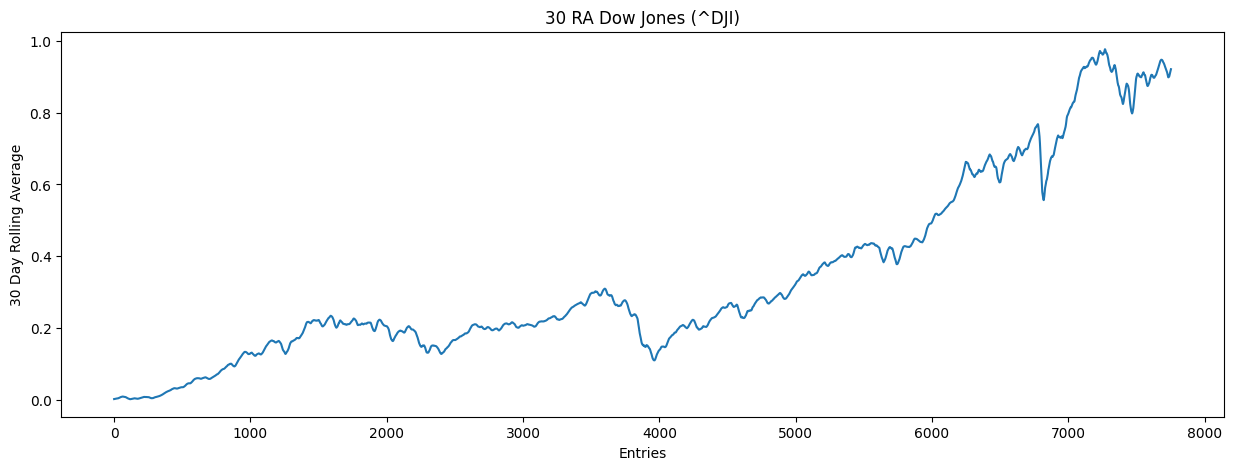

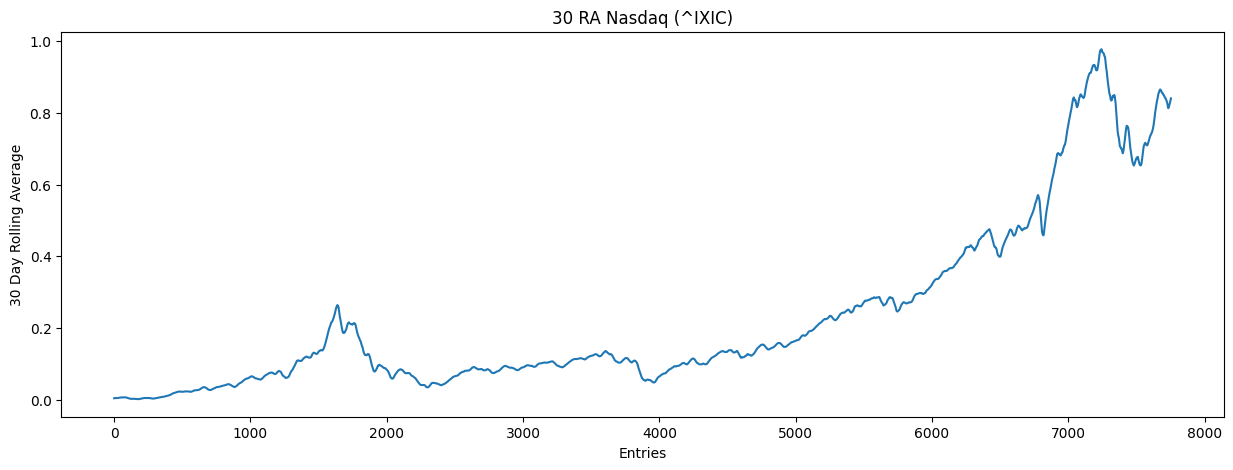

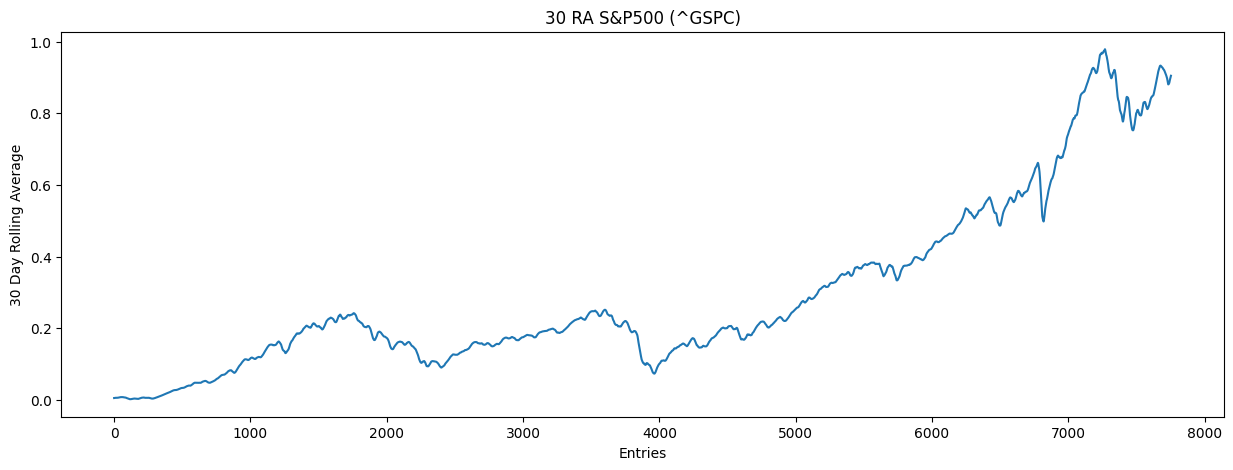

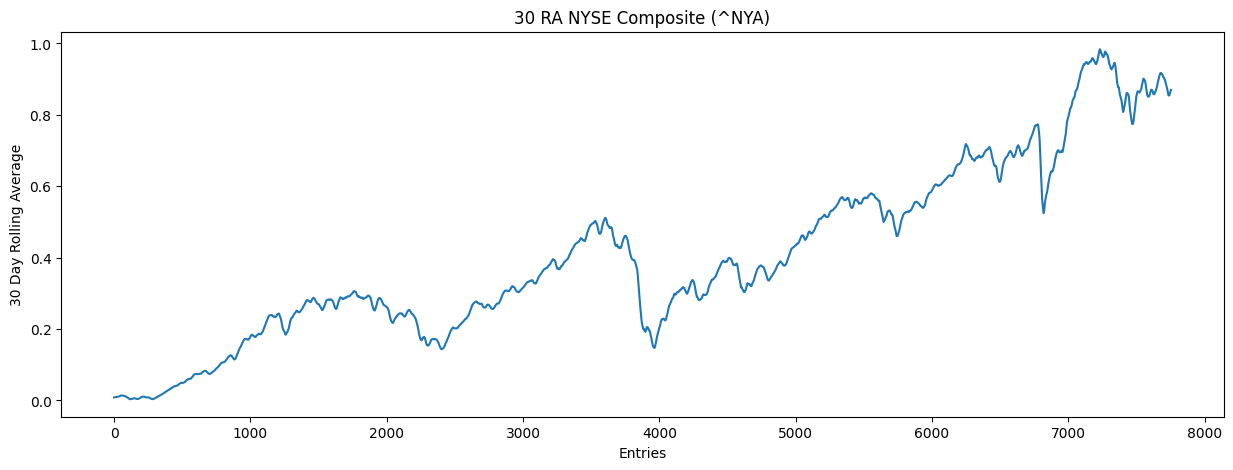

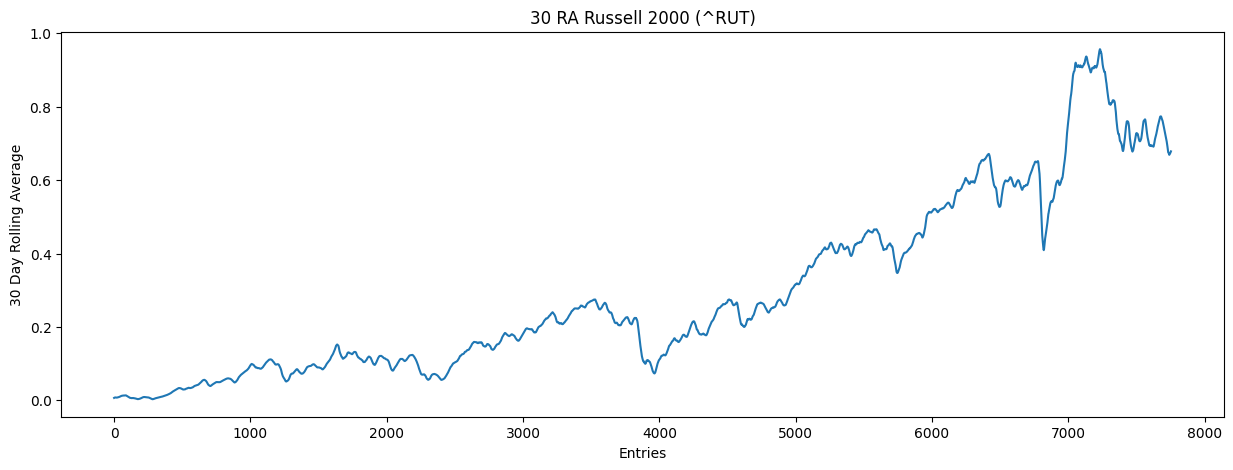

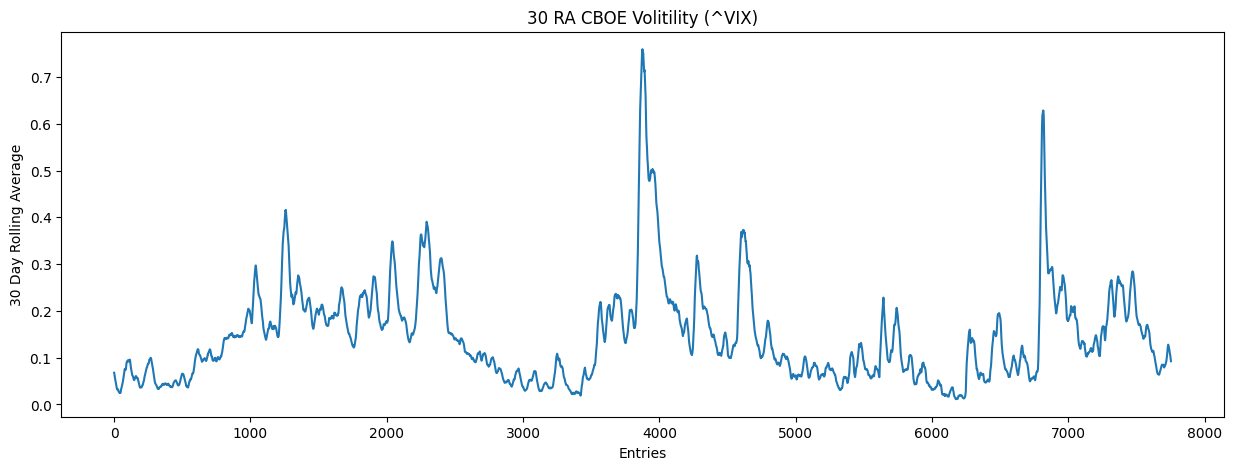

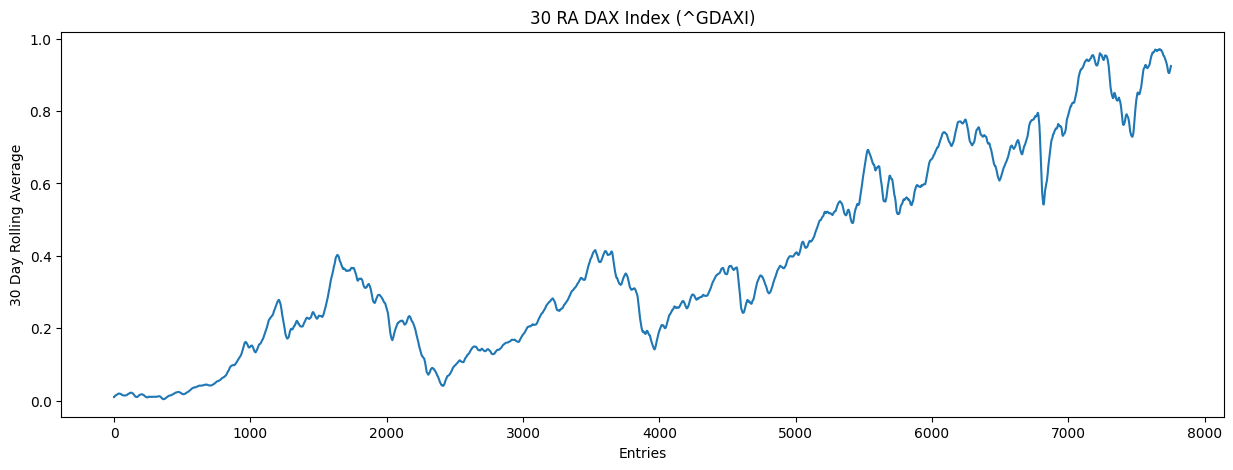

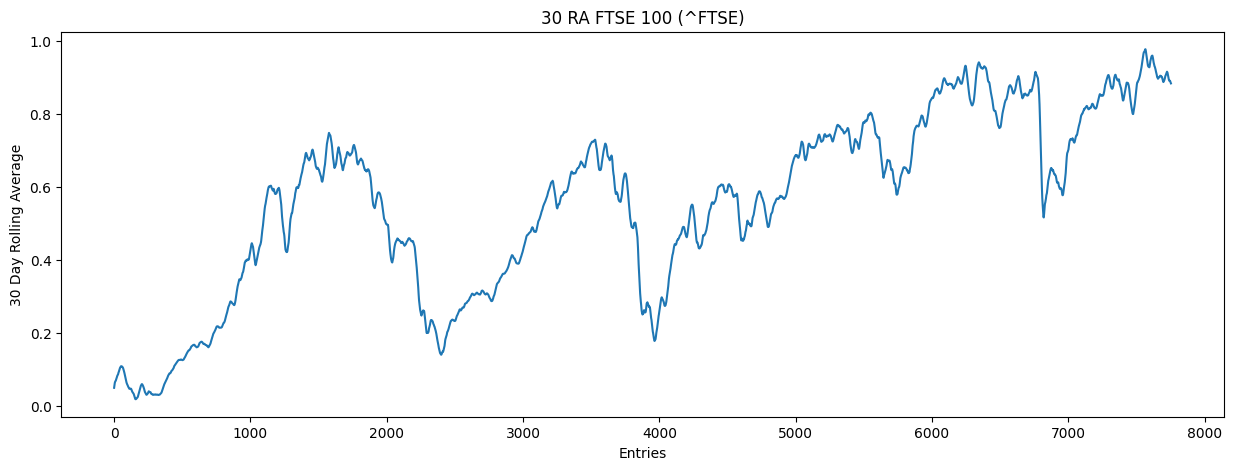

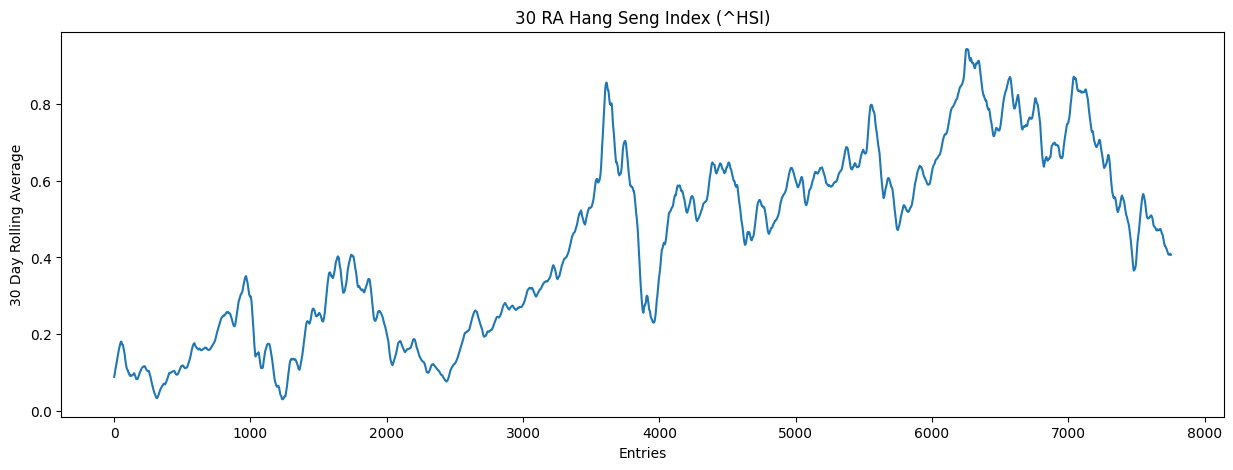

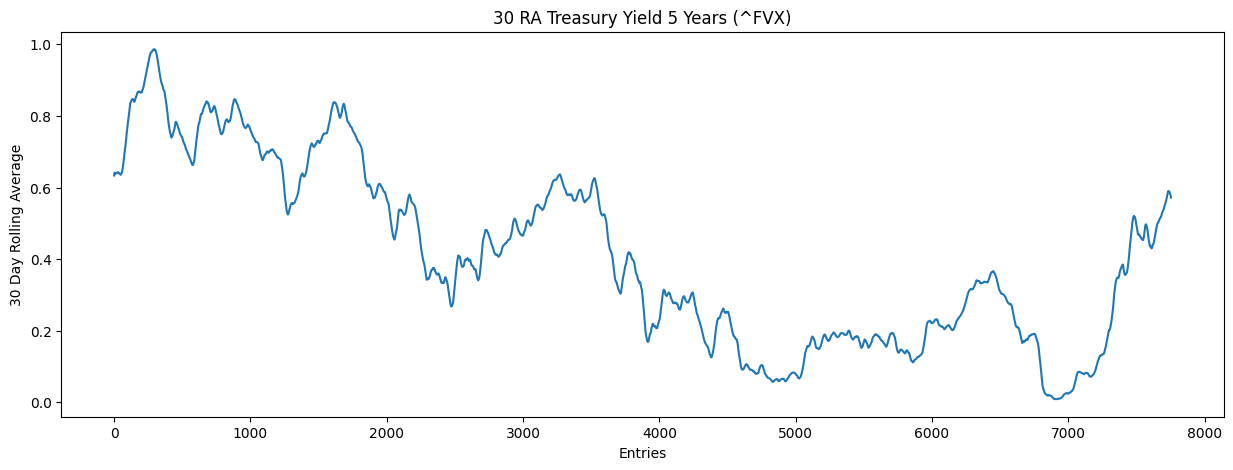

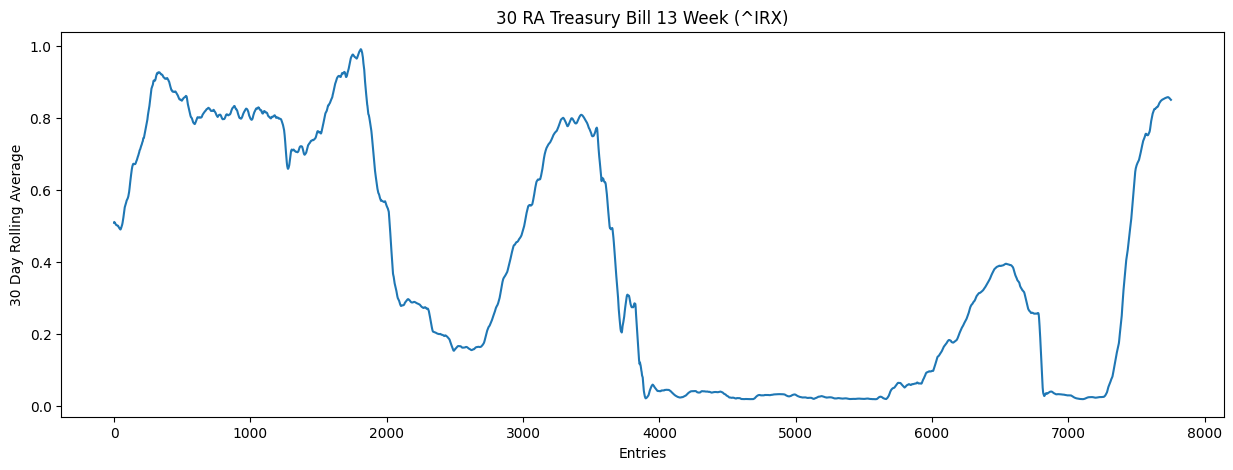

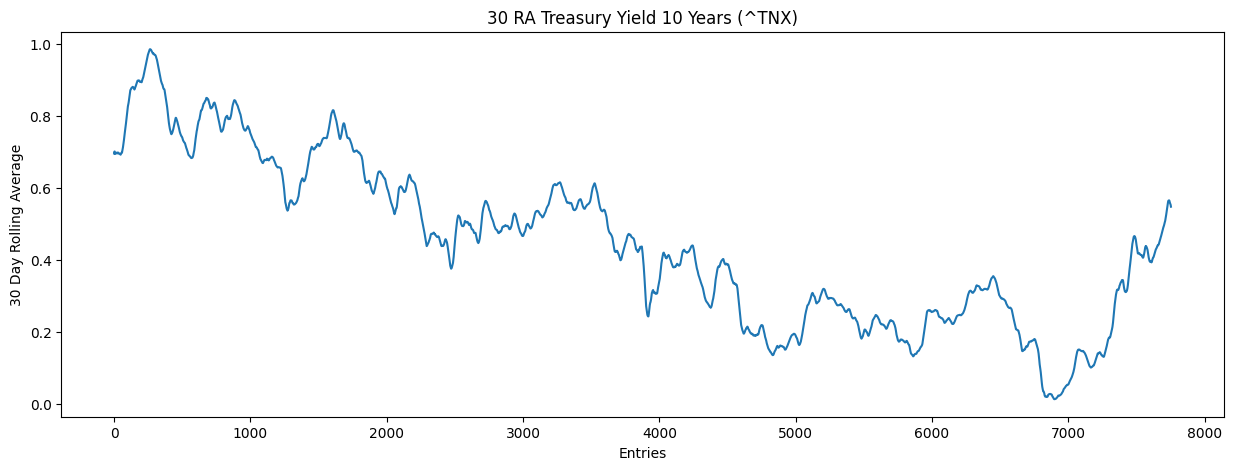

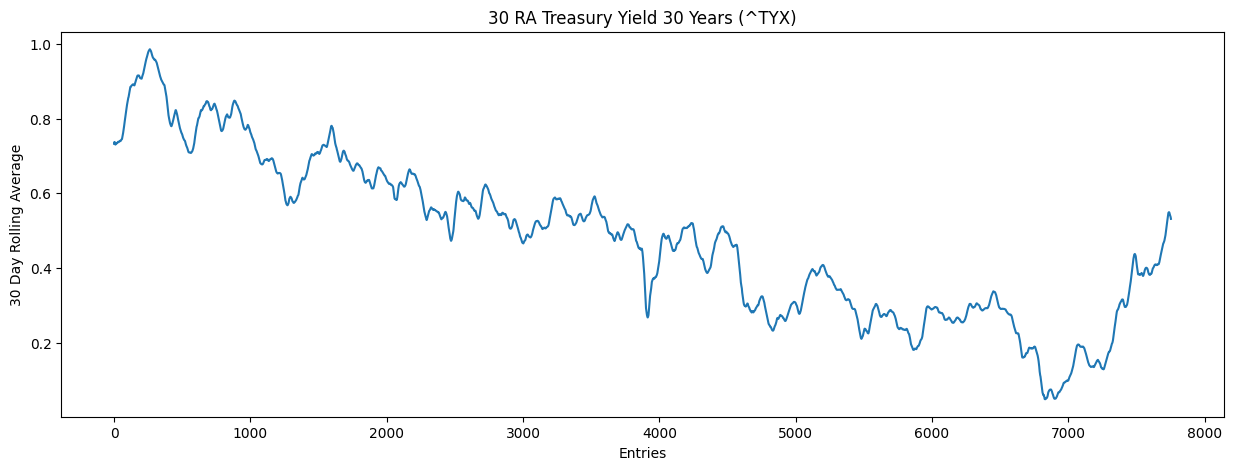

In [46]:
ra_columns = []
for col in df.columns:
    if '30 RA' in col:
        ra_columns.append(col)
df_ra = df[ra_columns]

for y in df_ra:
    df_ra[y].plot(figsize=(15, 5), title=f'{y}')
    plt.xlabel('Entries')
    plt.ylabel('30 Day Rolling Average')
    plt.show()

### **Individual Plot Analysis**


1.   Dow Jones - Positive Trend based on the positive slope over all entries.
2.   Nasdaq -  Positive Trend based on the positive slope over all entries.
3.   S&P 500 - Positive Trend based on the positive slope over all entries.
4.   NYSE Composite - Positive Trend based on the positive slope over all entries.
5.   Russell 2000 - Positive Trend based on the positive slope over all entries.
6.   CBOE Volatility - Nuetral Trend based on cyclical yet similar rolling average values as the earliest entry, there were some high spikes but it performed poorly after the peak, thus nuetral.
7.   DAX Index - Positive Trend based on the positive slope over all entries.
8.   FSTE 100 - Positive Trend based on the positive slope over all entries.
9.   Hang Seng Index - Positive Trend based on the positive slope over all entries.
10.  Treasury Yield 5 Years - Negative Trend based on the negative slope over all entries.
11.  Treasury Bill 13 Week - This particular fund has as interesting graph, it starts of quite high above 0.5, but drops very close to 0.0 at it's half life but the latter part after this steep drop from it's original rolling average value, it picks back up very close to the earliest rolling average data point, this could be considered nuetral but if we splice this into 2 15 year periods, the first half did very poorly but the second half did very well from the bottom, so depending on the time of investment this investment could have gone very bad or very well.
12.  Treasury Yield 10 years - Negative Trend based on the negative slope over all entries. But the latest trend, for the last part of the graph shows a very impressive rise so this could be something that is similar to the Treasy Bill 13 Year where this low to rise could be the half life of a positive investment avenue.
13.  Treasury Yield 30 Year - Negative Trend based on the negative slope over all entries. Same as 10 year treasury yield, there seems to be a comeback on the price action based on the rolling average plot, but not as impressive as the 10 year treasury yield.


Here we can see that most Treasury invesetment options haven't done very well overall, but there seems to be some hope based on the 13 week bill, 10 year and 30 year yield, these might prove to be useful investment avenues. But on the other hand almost all funds have shown a positive trend, slowly but surely gaining in value, proving to be very safe long term investment options.



### **Combined Plot for Further Analysis**

Now we will plot all the graphs we've seen above to possibly identify any other patterns or at the very least confirm our prior analysis. We will again make use of matplotlib but this time we will need an index to show the diffrent plots, we however will not require any plots as we can simply plot the data frame and create labels. To ensure there is clarity in the graph we will make this a rather large plot by using figsize.

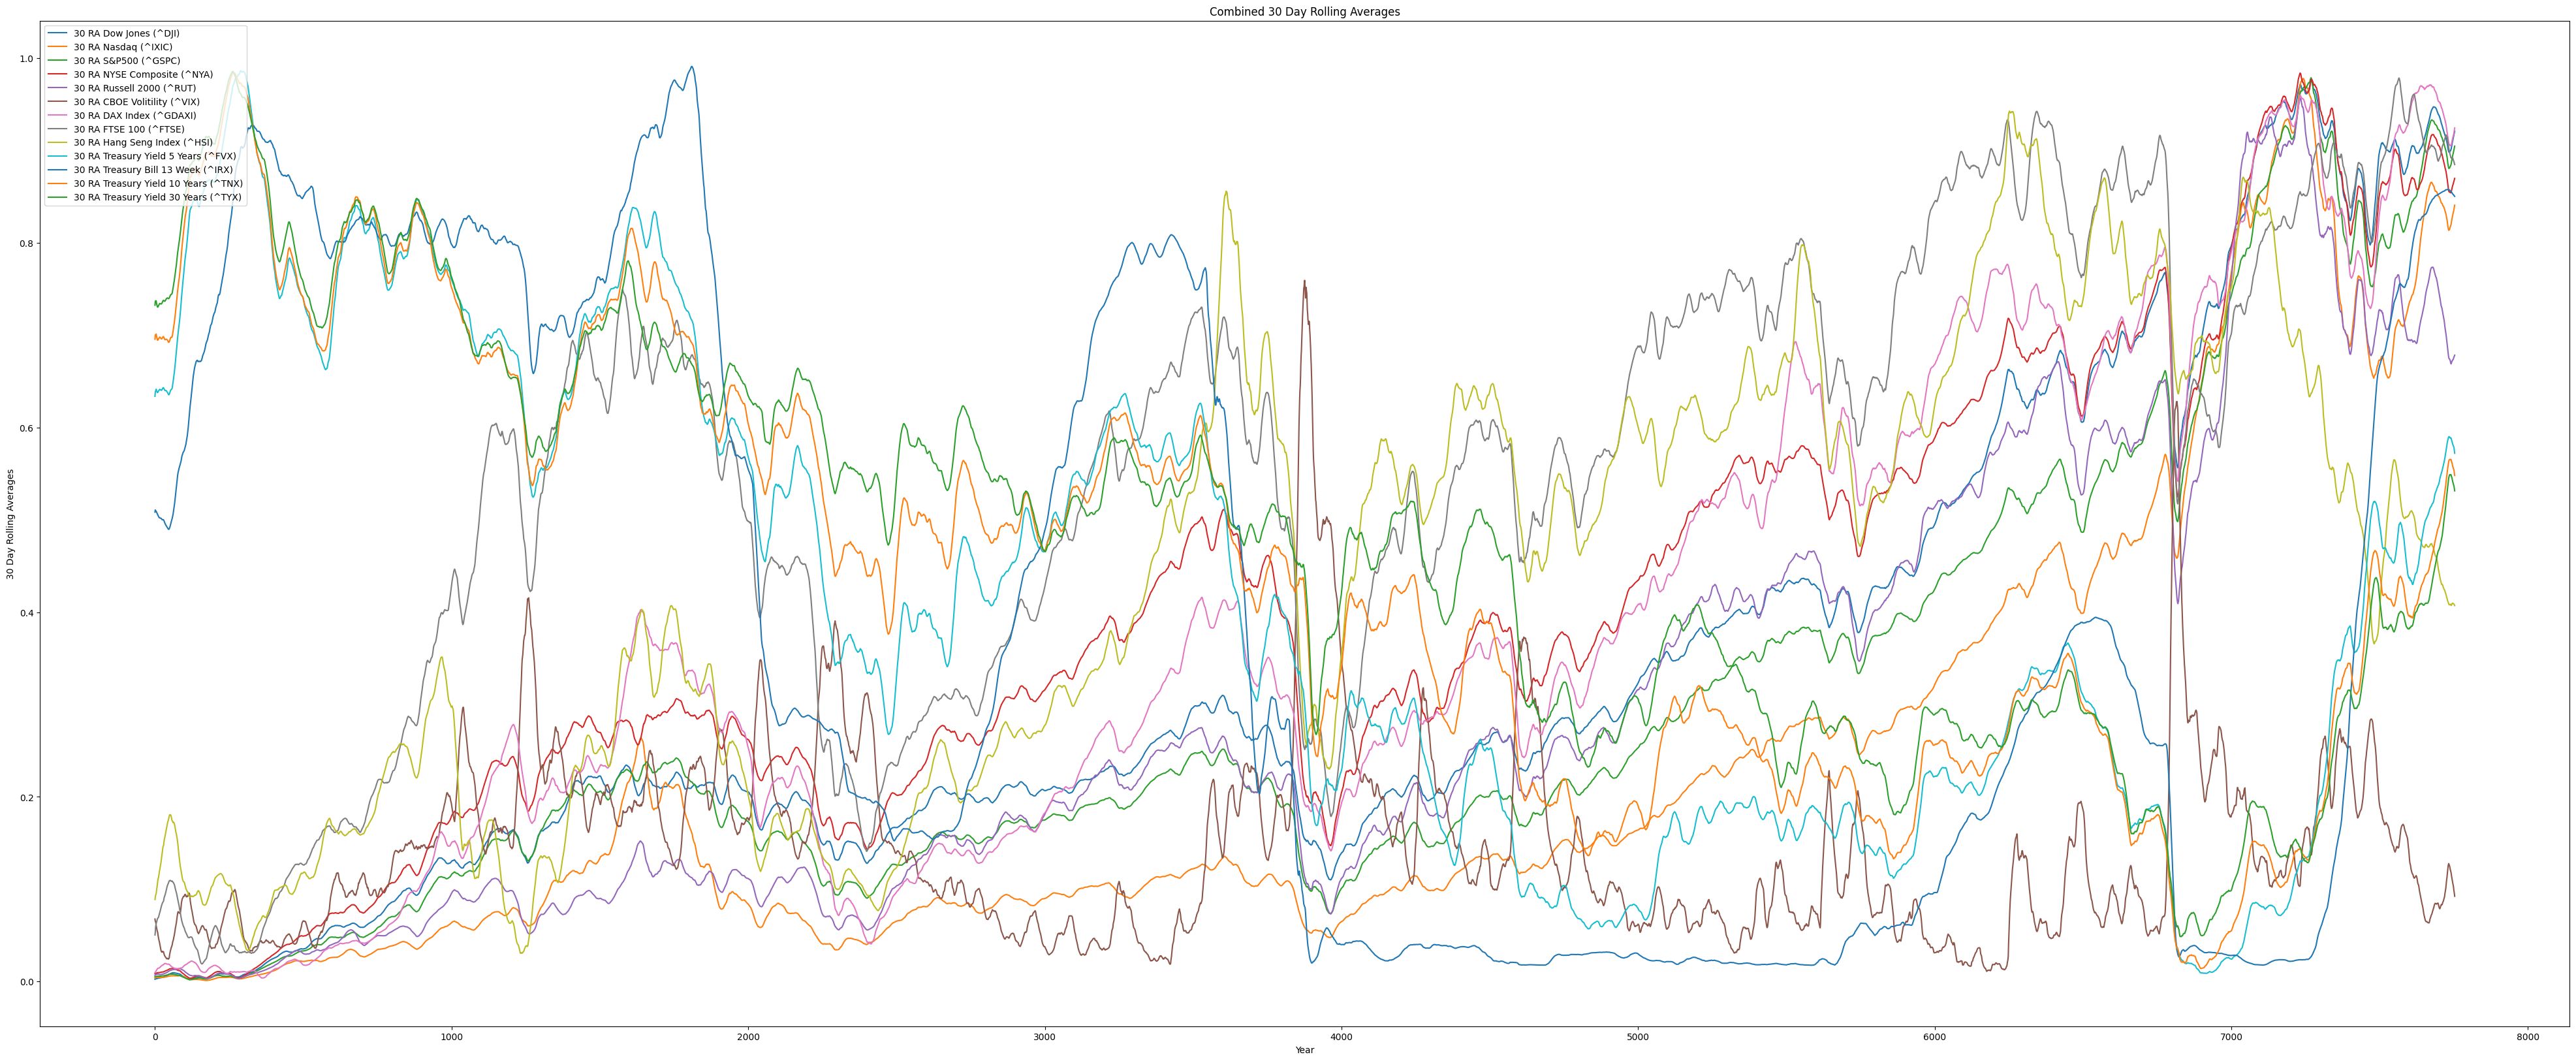

In [44]:
df_ra.plot(figsize=(50, 20), title='Combined 30 Day Rolling Averages')
plt.xlabel('Entries')
plt.ylabel('30 Day Rolling Averages')
plt.legend(loc='upper left')
plt.show()


### **Combined Plot Comments**

Based on the plot above we can see that the plots are very volatile but this only because we are obsevering the rolling averages of 30 years of data, however we do that majority of the investment options show a positive trend as we've seen before in the individual plots, this can point to the idea that, the economy has flourished and grown a lot over the last 30 years. We can also confirm out prior analysis by careful review of the graph that non-treasury investment options seem to be the safer bet for an investment return in while choosing long-term investment strategies and this makes sense as these funds are constantly updates and analyzed to pool the best individual stocks to constantly out-perfrom the prior year.

### **Median Rolling Average Analysis**

To figure out which investment option performed best or the worst, and to get answers to some other questions such as how the best option performed against the whole market, we will make use of quries such as idmax(), idmin() to get some values to perform further calculations to get a percent value of performance against the market. This helps us understand out of well performing options which is the better option and we can show this with quantitaive values. We will create a new data frame to only hold the median values, we can do this by first calculating the median of all the rolling averages, then add the medains and names of each invesment option to plot bar graphs and perform queries.


### **Median Data Frame Creation**

We first calulcated the median values of the rolling averages data frame and then created a new data frame called df_median to hold these values. This data frame has columns Median, Name.

In [48]:
median_per_col = df_ra.median()
df_median = pd.DataFrame(median_per_col, columns=['Median'])
df_median['Name'] = df_median.index
df_median.reset_index(drop=True, inplace=True)

df_median

,Median,Name
0,0.231863,30 RA Dow Jones (^DJI)
1,0.121779,30 RA Nasdaq (^IXIC)
2,0.204678,30 RA S&P500 (^GSPC)
3,0.352803,30 RA NYSE Composite (^NYA)
4,0.214289,30 RA Russell 2000 (^RUT)
5,0.123032,30 RA CBOE Volitility (^VIX)
6,0.314364,30 RA DAX Index (^GDAXI)
7,0.591892,30 RA FTSE 100 (^FTSE)
8,0.472303,30 RA Hang Seng Index (^HSI)
9,0.366310,30 RA Treasury Yield 5 Years (^FVX)


### **Queries to analyze median values**

Here we will identify the max median, min median, any investment options that did better than 0.5 (50th percentile) and finally we will get the meadian of all the medians to check how the max median performed vs the all the median values via basic math operations.



In [70]:
print('Max Median:{} {:.2f}'.format(df_median.loc[df_median['Median'].idxmax()]['Name'], df_median.loc[df_median['Median'].idxmax()]['Median']))
print('Min Median:{} {:.2f}'.format(df_median.loc[df_median['Median'].idxmin()]['Name'], df_median.loc[df_median['Median'].idxmin()]['Median']))

print('Medians above 0.5:')
medians_above = df_median[df_median['Median'] > 0.5]
if not medians_above.empty:
    for index, row in medians_above.iterrows():
        print('{} {:.2f}'.format(row['Name'], row['Median']))
else:
    print('None')

median_med = df_median['Median'].median()
print('Median of all rolling average medians: {:.2f}'.format(median_med))
proportionately_better = (median_med / df_median['Median'].max()) * 100
print("FTSE Did {:.2f}% better than the market".format(proportionately_better))


Max Median:30 RA FTSE 100 (^FTSE) 0.59
Min Median:30 RA Nasdaq (^IXIC) 0.12
Medians above 0.5:
30 RA FTSE 100 (^FTSE) 0.59
Median of all rolling average medians: 0.31
FTSE Did 53.11% better than the market


### **Insights based on Queries**

We can see that, the max median is FTSE 100 so we can call this the best performing fund of the rest. The worst performing fund suprisingly is the NASDAQ, even though we saw a positive trend previously this information points to something that was not known, so further analysis can be done by using other factors to figure out why this happened. We can also see that only the best fund FTSE 100 performed better than 0.5, which means, we could possibly change the best performance possible from 1 to something like 0.6 to dive deeper but for this particular notebook, we will stick to what we have. We can also identify that FTSE 100 did 53.11 percent better than the rest of the market.

In conclusion, this analysis of medians gave us a clear picture of the best investment option, but it also gave us information with which in the future, further analysis can be done with this new information about max possible performance or why nasdaq a positive trend fund has the lowest meedian and so on.

## **Bar Plot of Medain Data Frame**

We are going to make use of the Median Data Frame and matplotlib to get a visual depiction of our analysis above. We can do this by specifying the plot type as 'bar' and making use of Name as the x axis and Median Values as the y axis.

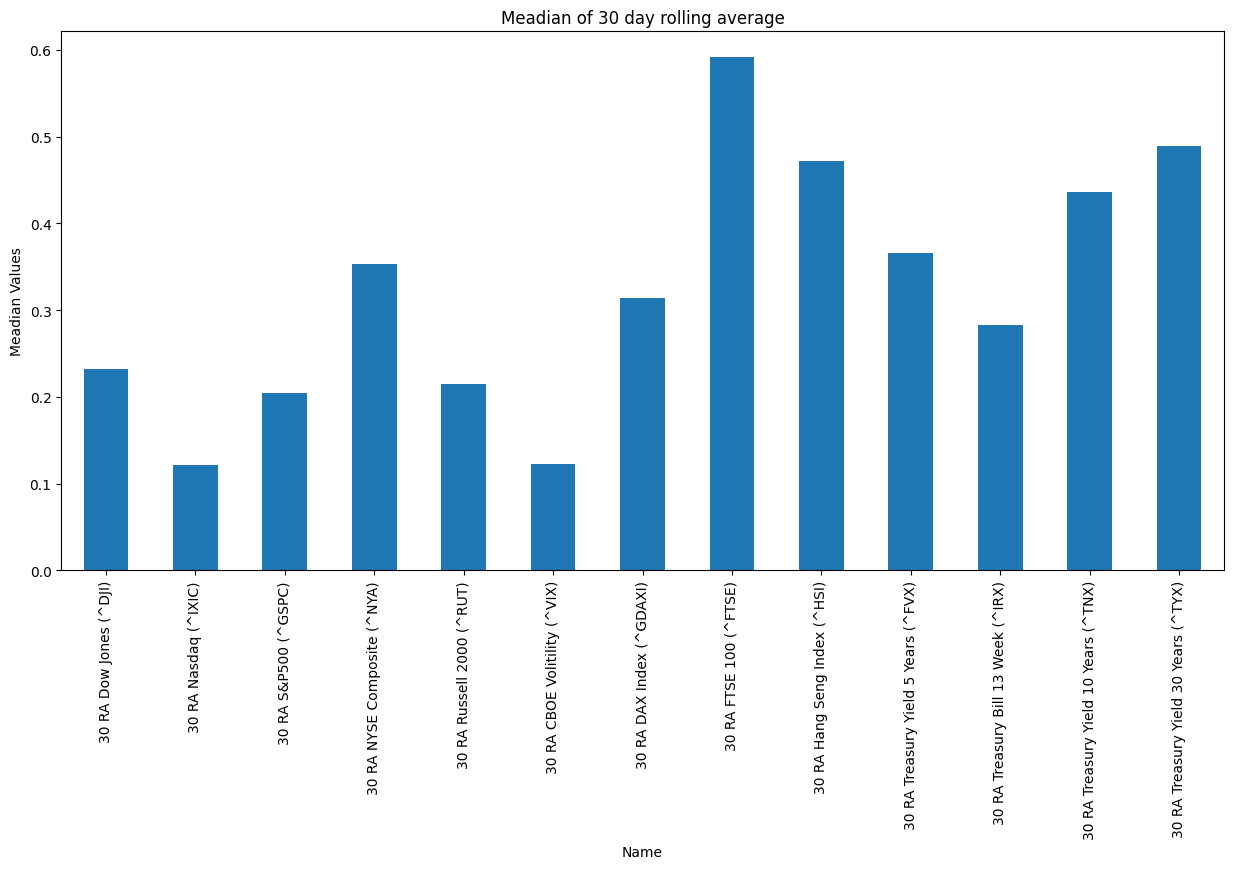

In [49]:
df_median.plot(kind='bar', x='Name', y='Median', figsize=(15, 7), title='Meadian of 30 day rolling average', legend=False)
plt.xlabel('Name')
plt.ylabel('Meadian Values')
plt.show()


### **Bar Plot Insights**

We can see from this bar plot some information we figured out previously via queries but the some additonal insights can be found here, along with FTSE 100, Hang Seng Index and Tresury Yield of 30 years seems to have the second and third highest median. This again regarding Treasury Yield is surprising, because earlier we identified a postive trend in the very end but the median adds to the narrative that this investment option might prove profitable, and we can see that NASDAQ as well as CBOE which earlier were identified as positive trend graphs now seems to be the poorest median values. The rest of the investment options seems lie between 0.25 and 0.45 which can be considered the market average. So any new fund that has such a median value can now be considered average performance based on this bar plot.

### **Pie Chart Analysis**

Finally to gain some insight on market share of each investment option, we can first calculate the total median and then use this to get percentage values against the totoal of each median for every investment option. We can then add these percentage values to the median data frame as new column and use the Name column and the percentage column to create a pie chart, this time rather than mentioning the plot type we will make use .pie, the calucations before that were done via using numpy functions such as .sum() alongside pandas data frame call for columns.

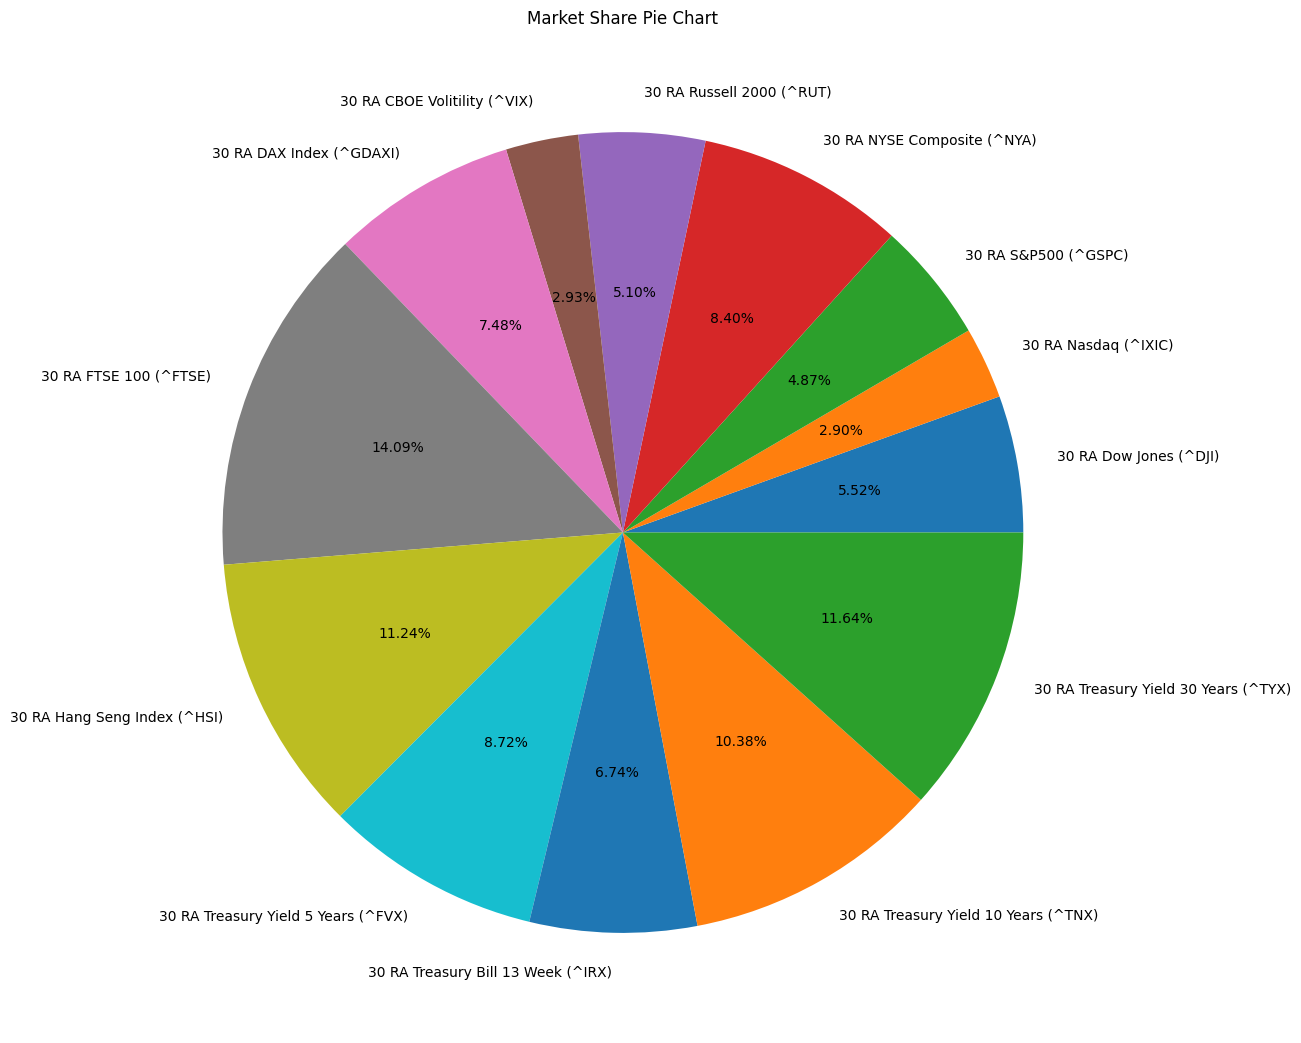

In [54]:
total_median = df_median['Median'].sum()
df_median['Percent'] = df_median['Median']/total_median

plt.figure(figsize=(13, 13))
plt.pie(df_median['Percent'], labels=df_median['Name'], autopct='%1.2f%%')
plt.title('Market Share Pie Chart')
plt.show()

### **Pie Chart Insights**

Based on this pie chart, FTSE 100, Hang Seng Index, Treasury Yield 10 year and 30 year seem be controlling approximately 46 percent of the market over 30 years. So long as these funds continue to perform well, a lot of investment capital might be tied up in these or there might be shift in this if there is any new drastic change in their performance for the capital to shift to the other investment options.

### **Conclusion**

By making use of Pandas, Numpy and Matplotlib, we have succesfully peformed analysis on 30 years of stock market closing prices data. Although this analysis is navie as it makes use of only rolling averages and medains, it does provide a lot of insight about the invesment options presented. We identified that FTSE 100 is a very profitable investment along with Hang Seng fund, and surprisingly contratry to initial analysis Treasury options seems to be equally useful investment options. NASDAQ the biggest surpise of them all although showed a positive trend at first, but with the lowest median and market share of only 2.90% points to the need of further investigation, as this very popular fund in social media, news and other outlets seems to be a poor investment choice according to our analysis. Further and more sophisticated analysis can be done via using Machine Learning techniques as models can be trained and predictive prices can be found to further our understanding of the market prices. We only acheived this following proper technique of data handling such as normalization and data clean up of missing data. Overall, this analysis can help any investor gain a baseline understanding about these funds and help make informed decisions.